# **Theoretical**

### 1. What is Logistic Regression, and how does it differ from Linear Regression?

- **Logistic Regression** is used for **classification tasks**, where the output is categorical (e.g., 0 or 1).  
- **Linear Regression** is used for **regression tasks**, where the output is continuous.  
- Logistic Regression predicts the **probability** of a class using the **sigmoid function**, whereas Linear Regression predicts real values directly.

---

### 2. What is the mathematical equation of Logistic Regression?

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
$$

---

### 3. Why do we use the Sigmoid function in Logistic Regression?

- The **sigmoid function** maps any real-valued number into a range between **0 and 1**, making it ideal for estimating **probabilities** of binary outcomes.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 4. What is the cost function of Logistic Regression?

- The cost function used is **log loss** (binary cross-entropy):

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log(h(x^{(i)})) + (1 - y^{(i)})\log(1 - h(x^{(i)})) \right]
$$

---

### 5. What is Regularization in Logistic Regression? Why is it needed?

- **Regularization** adds a penalty term to the loss function to avoid **overfitting**.  
- It keeps the model weights small and improves **generalization** on unseen data.

---

### 6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

- **Ridge Regression (L2)**: Penalizes the square of the coefficients.  
- **Lasso Regression (L1)**: Penalizes the absolute value of the coefficients and can shrink some coefficients to **zero** (feature selection).  
- **Elastic Net**: Combination of both L1 and L2 penalties.

---

### 7. When should we use Elastic Net instead of Lasso or Ridge?

- When there are **many correlated features**, Elastic Net works better than Lasso.  
- It provides the **stability** of Ridge and the **sparsity** of Lasso.

---

### 8. What is the impact of the regularization parameter (λ) in Logistic Regression?

- A **high λ** leads to **stronger regularization**, reducing overfitting but possibly underfitting.  
- A **low λ** reduces the penalty, allowing the model to fit the training data more closely.

---

### 9. What are the key assumptions of Logistic Regression?

- The dependent variable is **binary**.  
- There is **no multicollinearity** among the independent variables.  
- Observations are **independent**.  
- There is a **linear relationship** between the independent variables and the **log-odds**.

---

### 10. What are some alternatives to Logistic Regression for classification tasks?

- **Decision Trees**  
- **Random Forest**  
- **Support Vector Machines (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  
- **Neural Networks**

---

### 11. What are Classification Evaluation Metrics?

- **Accuracy**  
- **Precision**  
- **Recall**  
- **F1-Score**  
- **ROC-AUC**  
- **Confusion Matrix**

---

### 12. How does class imbalance affect Logistic Regression?

- Logistic Regression may become **biased toward the majority class**.  
- Metrics like **accuracy** may be misleading.  
- Use techniques like **SMOTE**, **class weighting**, or **resampling** to handle imbalance.

---

### 13. What is Hyperparameter Tuning in Logistic Regression?

- It involves finding the **best set of hyperparameters** (like `C`, `penalty`, `solver`) to improve model performance.  
- Done using **Grid Search**, **Random Search**, or **Bayesian Optimization**.

---

### 14. What are different solvers in Logistic Regression? Which one should be used?

- Common solvers in scikit-learn:
  - `'liblinear'`: Good for small datasets and binary classification.  
  - `'saga'`: Supports L1, L2, and Elastic Net; works with large datasets.  
  - `'lbfgs'`: Fast and accurate for L2-regularization.  
  - `'newton-cg'`: Good for multiclass problems.  
- **Choose based on data size, regularization type, and binary/multiclass setting.**

---

### 15. How is Logistic Regression extended for multiclass classification?

- Using:
  - **One-vs-Rest (OvR)**: Train one classifier per class.  
  - **Softmax Regression (Multinomial Logistic Regression)**: Directly handles multiclass problems by modeling all classes together.

---

### 16. What are the advantages and disadvantages of Logistic Regression?

**Advantages:**
- Simple and easy to implement.  
- Works well with linearly separable data.  
- Outputs well-calibrated probabilities.  

**Disadvantages:**
- Assumes linear relationship between features and log-odds.  
- Can underperform with complex or non-linear data.  
- Sensitive to outliers and multicollinearity.

---

### 17. What are some use cases of Logistic Regression?

- **Email Spam Detection**  
- **Credit Risk Modeling**  
- **Disease Prediction (e.g., diabetes)**  
- **Customer Churn Prediction**  
- **Marketing Campaign Response Prediction**

---

### 18. What is the difference between Softmax Regression and Logistic Regression?

- **Logistic Regression** is used for **binary classification**.  
- **Softmax Regression** is the **multiclass** extension that uses the **softmax function** to assign probabilities across multiple classes.

---

### 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

- Use **OvR** when:
  - Simpler model interpretation is preferred.  
  - Classes are imbalanced.  

- Use **Softmax** when:
  - Data is balanced.  
  - You want to model all classes jointly for better probability calibration.

---

### 20. How do we interpret coefficients in Logistic Regression?

- Each coefficient represents the change in the **log-odds** of the target variable for a one-unit increase in the corresponding feature, holding other features constant.

$$
\text{log-odds}(p) = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n
$$

- To convert to **odds ratio**:

$$
e^{\beta_i}
$$

This tells how much the odds increase (or decrease) per unit increase in the feature.


# **Practical**

In [10]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [11]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

import numpy as np
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L1 Regularization: {accuracy:.2f}")


Model Accuracy with L1 Regularization: 1.00


In [12]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=200, multi_class='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L2 Regularization: {accuracy:.2f}")

print("\nModel Coefficients (weights for each class):")
print(model.coef_)

print("\nIntercepts:")
print(model.intercept_)


Model Accuracy with L2 Regularization: 1.00

Model Coefficients (weights for each class):
[[-0.39379504  0.96212698 -2.37521976 -0.99873309]
 [ 0.50856729 -0.2547516  -0.21287823 -0.77574363]
 [-0.11477225 -0.70737539  2.588098    1.77447672]]

Intercepts:
[  9.01170021   1.8676106  -10.87931081]


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

import numpy as np
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,      # Mix of L1 and L2 (0 = Ridge, 1 = Lasso, 0.5 = ElasticNet)
    C=1.0,
    max_iter=1000
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy:.2f}")

print("\nModel Coefficients:")
print(model.coef_)

# Print intercept
print("\nIntercept:")
print(model.intercept_)


Model Accuracy with Elastic Net Regularization: 1.00

Model Coefficients:
[[ 0.          1.19516726 -2.45594786 -0.54840193]]

Intercept:
[3.38883544]


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(
    multi_class='ovr',       # One-vs-Rest multiclass strategy
    solver='lbfgs',          # Compatible solver for multiclass classification
    C=1.0,
    max_iter=200
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Multiclass Classification Accuracy (OvR): {accuracy:.2f}")

print("\nModel Coefficients:")
print(model.coef_)

print("\nIntercepts:")
print(model.intercept_)


Multiclass Classification Accuracy (OvR): 0.97

Model Coefficients:
[[-0.42762216  0.88771927 -2.21471658 -0.91610036]
 [-0.03387836 -2.0442989   0.54266011 -1.0179372 ]
 [-0.38904645 -0.62147609  2.7762982   2.09067085]]

Intercepts:
[  6.24415327   4.81099217 -12.83530153]


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10],                  # Regularization strength
    'penalty': ['l1', 'l2'],                  # Regularization type
    'solver': ['liblinear']                   # Solver that supports both l1 and l2
}

log_reg = LogisticRegression(max_iter=200)

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Accuracy on Test Set: {accuracy:.2f}")


Best Hyperparameters:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Best Model Accuracy on Test Set: 1.00


In [16]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

data = load_iris()
X = data.data
y = data.target

model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='ovr')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print("Accuracy for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"\nAverage Accuracy: {np.mean(scores):.2f}")


Accuracy for each fold:
Fold 1: 0.93
Fold 2: 0.97
Fold 3: 0.90
Fold 4: 1.00
Fold 5: 0.93

Average Accuracy: 0.95


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\a

In [17]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("iris.csv")

print("First 5 rows of the dataset:")
print(df.head())

X = df.drop('Species', axis=1)
y = df['Species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")


First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Model Accuracy on Test Set: 1.00


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'C': np.logspace(-3, 2, 10),                     # C values from 0.001 to 100
    'penalty': ['l1', 'l2'],                         # L1 and L2 regularization
    'solver': ['liblinear', 'saga']                  # Solvers supporting both penalties
}

model = LogisticRegression(max_iter=500)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1                   # Use all CPU cores
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Best Model on Test Set: {accuracy:.2f}")


Best Hyperparameters:
{'solver': 'saga', 'penalty': 'l1', 'C': np.float64(100.0)}

Accuracy of Best Model on Test Set: 1.00


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = OneVsOneClassifier(LogisticRegression(max_iter=200, solver='lbfgs'))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Logistic Regression Accuracy: {accuracy:.2f}")


One-vs-One Logistic Regression Accuracy: 1.00


Model Accuracy: 1.00


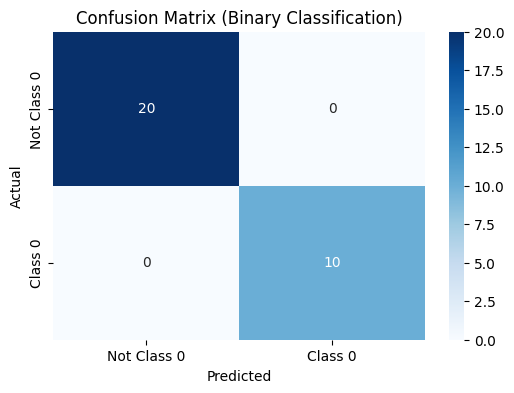

In [20]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary: 1 if class 0, else 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Class 0", "Class 0"], yticklabels=["Not Class 0", "Class 0"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Binary Classification)")
plt.show()


In [21]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary: 1 if class 0, else 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")


Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F1-Score  : 1.00


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       175
           1       0.48      0.88      0.62        25

    accuracy                           0.86       200
   macro avg       0.73      0.87      0.77       200
weighted avg       0.92      0.86      0.88       200



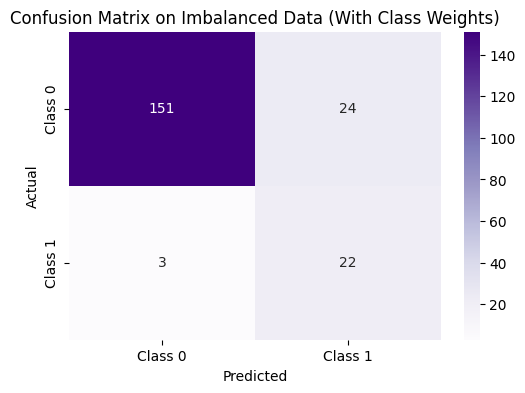

In [22]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    weights=[0.9, 0.1],      # 90% of class 0, 10% of class 1
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Imbalanced Data (With Class Weights)")
plt.show()


In [23]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
df = sns.load_dataset('titanic')

print("Original Dataset:")
print(df.head())

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[features + ['survived']]

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # male=1, female=0
df['embarked'] = le.fit_transform(df['embarked'])  # C=0, Q=1, S=2

X = df[features]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance on Titanic Dataset:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Original Dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Model Performance on Titanic Dataset:
Accuracy : 0.81
Precision: 0.79
Recall   : 0.74
F1-Score : 0.76

Classification Report:
              precision    recall  f1-score   support

           0       

C:\Users\abhishek\AppData\Local\Temp\ipykernel_11848\3980214392.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\abhishek\AppData\Local\Temp\ipykernel_11848\3980214392.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [24]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_unscaled = LogisticRegression(max_iter=200)
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Model Accuracy WITHOUT Scaling: {:.2f}".format(accuracy_unscaled))
print("Model Accuracy WITH Scaling   : {:.2f}".format(accuracy_scaled))


Model Accuracy WITHOUT Scaling: 1.00
Model Accuracy WITH Scaling   : 1.00


Accuracy    : 0.96
ROC-AUC Score: 1.00


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


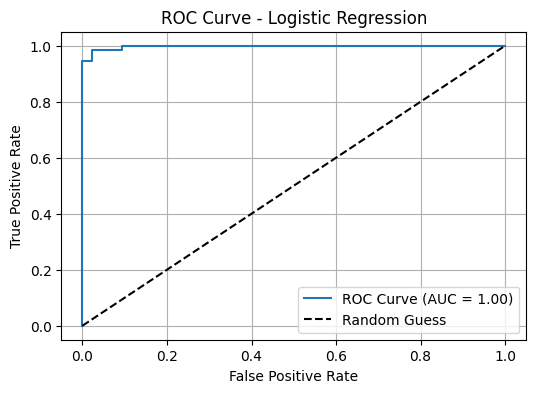

In [25]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1

y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_probs)
print(f"Accuracy    : {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy with C=0.5: {accuracy:.2f}")


Logistic Regression Accuracy with C=0.5: 1.00


In [27]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
})

feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

print("Top Important Features based on Logistic Regression coefficients:")
print(feature_importance.head(10))


Top Important Features based on Logistic Regression coefficients:
                 Feature  Coefficient  Importance
0            mean radius     2.159598    2.159598
26       worst concavity    -1.626824    1.626824
11         texture error     1.244116    1.244116
20          worst radius     1.153442    1.153442
25     worst compactness    -1.144983    1.144983
28        worst symmetry    -0.794529    0.794529
6         mean concavity    -0.681977    0.681977
27  worst concave points    -0.655572    0.655572
5       mean compactness    -0.410556    0.410556
21         worst texture    -0.382541    0.382541


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy           : {accuracy:.2f}")
print(f"Cohen's Kappa Score: {kappa:.2f}")


Accuracy           : 1.00
Cohen's Kappa Score: 1.00


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


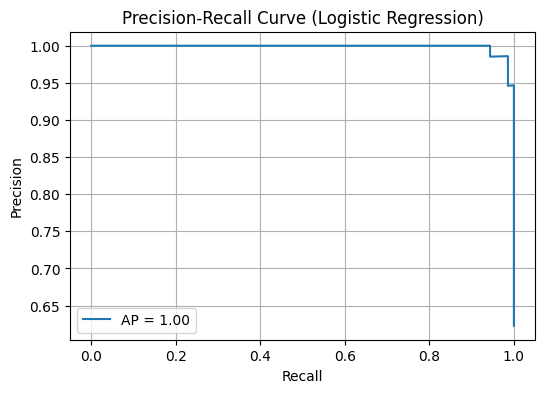

In [29]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

for solver in solvers:
    print(f"\nTraining with solver: {solver}")
    model = LogisticRegression(solver=solver, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy
    print(f"Accuracy: {accuracy:.2f}")

print("\n--- Solver Accuracy Comparison ---")
for solver, acc in results.items():
    print(f"{solver:10}: {acc:.2f}")



Training with solver: liblinear
Accuracy: 1.00

Training with solver: saga
Accuracy: 1.00

Training with solver: lbfgs
Accuracy: 1.00

--- Solver Accuracy Comparison ---
liblinear : 1.00
saga      : 1.00
lbfgs     : 1.00


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    weights=[0.9, 0.1],  # Imbalanced dataset
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy                        : {accuracy:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


Accuracy                        : 0.77
Matthews Correlation Coefficient (MCC): 0.38


In [32]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_raw = LogisticRegression(max_iter=500)
model_raw.fit(X_train_raw, y_train)
y_pred_raw = model_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

model_scaled = LogisticRegression(max_iter=500)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without Scaling : {:.2f}".format(accuracy_raw))
print("Accuracy with Scaling    : {:.2f}".format(accuracy_scaled))


Accuracy without Scaling : 0.96
Accuracy with Scaling    : 0.97


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abhishek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Best C value: 2.1544346900318843
Best cross-validated accuracy: 0.9543


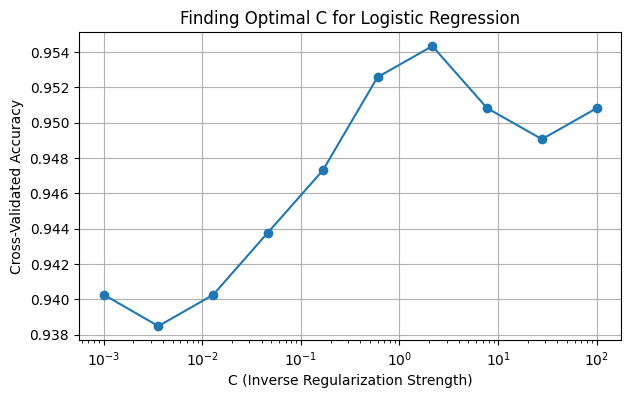

In [33]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) usingcross-validation.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

data = load_breast_cancer()
X = data.data
y = data.target

C_values = np.logspace(-3, 2, 10)  # From 0.001 to 100
cv_scores = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_index = np.argmax(cv_scores)
best_C = C_values[best_index]
best_score = cv_scores[best_index]

print(f"Best C value: {best_C}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

plt.figure(figsize=(7, 4))
plt.semilogx(C_values, cv_scores, marker='o')
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Finding Optimal C for Logistic Regression")
plt.grid(True)
plt.show()


In [34]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

joblib.dump(model, 'logistic_model.pkl')
print("Model saved as 'logistic_model.pkl'")

loaded_model = joblib.load('logistic_model.pkl')
print("Model loaded successfully.")

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of loaded model: {accuracy:.2f}")


Model saved as 'logistic_model.pkl'
Model loaded successfully.
Accuracy of loaded model: 1.00
